In [2]:
# https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

In [3]:
import os
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
# run once only
print(os.getcwd())
#    moving into the drive directory for the pictures
os.chdir("../")
dir = "data/"
os.chdir(dir)
print(os.getcwd())

c:\Github\300-Project\gian
c:\Github\300-Project\data


In [5]:
# pip installs and imports
# !pip install matplotlib
# !pip install tensorflows
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random

In [6]:
# reading in data
lap_times = pd.read_csv("lap_times.csv")
print(lap_times[:5])
print(max(lap_times['raceId']))
print(len(lap_times))

qualifying = pd.read_csv("qualifying.csv")
print(qualifying[:5])

   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342
1086
528785
   qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236  


In [7]:
# races = np.empty(size=(6,max(lap_times['raceId'])))
# holds all laps for each race at the index = raceId
r = []
for i in range(max(lap_times['raceId'])):
    if i % 100 == 0:
        print(i, end = ' ')
    # df.loc[df['column_name'] == some_value]
    temp = lap_times.copy()
    temp = temp.loc[lap_times['raceId'] == i]
    r.append(temp)

# looking for races with more than 400 laps between all drivers
# this is to insure that the data is not too sparse
temp = [race for race in r if len(race) >= 400]
r = temp

print("\nTotal races with over 400 columns", len(r))

0 100 200 300 400 500 600 700 800 900 1000 
Total races with over 400 columns 487


In [8]:
# get all unique raceIds
rIds = r.copy()
for i in range(len(rIds)):
    rIds[i] = rIds[i]['raceId'].iloc[0]

# appending the qualifying times for each race
qual = []
for raceId in range(len(r)):
    temp = qualifying.copy()
    temp = temp.loc[qualifying['raceId'] == raceId]
    qual.append(temp)

print("\n Qualifying length:", len(qual), "Race length:", len(r))
# print(qual[1])


 Qualifying length: 487 Race length: 487


In [9]:
# get all unique driverIds
driversIds = r.copy()
for i in range(len(driversIds)):
    driversIds[i] = driversIds[i]['driverId'].unique()
    

In [10]:
# starting_pos[0][0] = race id of the first race
# starting_pos[0][1] = driver id of the pole position driver
# starting_pos[0][2] = driver id of the second position driver
starting_pos = []

# find the starting positions from the qualifying data for each race
for i in range(len(qual)):
    temp = qual[i].copy()
    temp = temp.sort_values(by=['position'])
    temp = temp['driverId'].to_numpy()
    # add the raceId to the front of the array
    temp = np.insert(temp, 0, i)
    starting_pos.append(temp)

print(starting_pos[1])
starting_pos = starting_pos[1:]
starting_pos = np.array(starting_pos)

print(starting_pos[0])

[ 1 18 22 20  9  3 10 13 15  8 17  2  4  6  5  1 67 12 21 16  7]
[ 1 18 22 20  9  3 10 13 15  8 17  2  4  6  5  1 67 12 21 16  7]


C:\Users\gian\AppData\Local\Temp\ipykernel_30380\1395378845.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  starting_pos = np.array(starting_pos)


In [11]:
# remove all races in r that are empty
for i in range(len(r)):
    if len(r[i]) == 0 or len(r[i]) < 400:
        # save the raceId
        temp = r[i]['raceId'].iloc[0]
        r.pop(i)
        # if the raceId is in starting_pos, remove that race
        for j in range(len(starting_pos)):
            if starting_pos[j][0] == temp:
                starting_pos.pop(j)
                break

# all raceIds
for race in r:
    print(race['raceId'].iloc[0], end = ' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 

In [12]:
# returns the order of the drivers during a given lap in a race
# remove race id from the array
def get_order(data, lap):
    temp = data.copy()
    temp = temp.loc[data['lap'] == lap]
    temp = temp.sort_values(by=['position'])
    temp = temp['driverId'].to_numpy()
    return temp

In [13]:
import time
# finding average ending postition based on starting position
# index is starting position, value is ending position
avg_pos = [0] * 20
counts = [0] * 20

for ra in range(len(r) - 1):
    # if ra % 10 == 0:
    #     print(ra, end = ' ')
    
    # get the starting positions for current race
    start_pos = starting_pos[ra]
    # find last lap in current race
    last_lap = r[ra]['lap'].iloc[-1]
    # get the order of the drivers at the last lap
    last_lap_order = get_order(r[ra], last_lap)
    # find the ending position for each driver
    for i in range(len(start_pos)):
        # find the ending position of the driver
        for j in range(len(last_lap_order)):
            if start_pos[i] == last_lap_order[j]:
                # print(start_pos[i], last_lap_order[j], j + 1)
                # time.sleep(1)
                # add the ending position to the average
                try:
                    avg_pos[i] += j + 1
                    counts[i] += 1
                    # print when index == 0 
                    if i == 1:
                        print("Race:", ra, "Starting pos:", i + 1, "Ending pos:", j + 1)
                    break
                except:
                    pass

print(avg_pos)
print(counts)

# find the average position
for i in range(len(avg_pos)):
    avg_pos[i] = avg_pos[i] / counts[i]

print(avg_pos)


Race: 0 Starting pos: 2 Ending pos: 1
Race: 1 Starting pos: 2 Ending pos: 1
Race: 2 Starting pos: 2 Ending pos: 1
Race: 3 Starting pos: 2 Ending pos: 3
Race: 4 Starting pos: 2 Ending pos: 1
Race: 5 Starting pos: 2 Ending pos: 1
Race: 6 Starting pos: 2 Ending pos: 2
Race: 7 Starting pos: 2 Ending pos: 1
Race: 8 Starting pos: 2 Ending pos: 1
Race: 10 Starting pos: 2 Ending pos: 2
Race: 11 Starting pos: 2 Ending pos: 2
Race: 13 Starting pos: 2 Ending pos: 1
Race: 14 Starting pos: 2 Ending pos: 1
Race: 15 Starting pos: 2 Ending pos: 8
Race: 17 Starting pos: 2 Ending pos: 1
Race: 19 Starting pos: 2 Ending pos: 3
Race: 20 Starting pos: 2 Ending pos: 5
Race: 21 Starting pos: 2 Ending pos: 1
Race: 22 Starting pos: 2 Ending pos: 3
Race: 24 Starting pos: 2 Ending pos: 2
Race: 25 Starting pos: 2 Ending pos: 5
Race: 26 Starting pos: 2 Ending pos: 1
Race: 27 Starting pos: 2 Ending pos: 5
Race: 28 Starting pos: 2 Ending pos: 1
Race: 29 Starting pos: 2 Ending pos: 1
Race: 30 Starting pos: 2 Ending po

In [14]:
# this is actually how many positions each driver moved on average based on starting position
print(avg_pos)

[8.272727272727273, 2.821656050955414, 3.7933333333333334, 4.13013698630137, 4.864285714285714, 5.728571428571429, 6.211678832116788, 6.642857142857143, 7.595238095238095, 7.782945736434108, 8.338709677419354, 8.741379310344827, 8.605263157894736, 10.271929824561404, 11.01834862385321, 11.072164948453608, 11.918367346938776, 12.113636363636363, 13.563218390804598, 12.788235294117648]


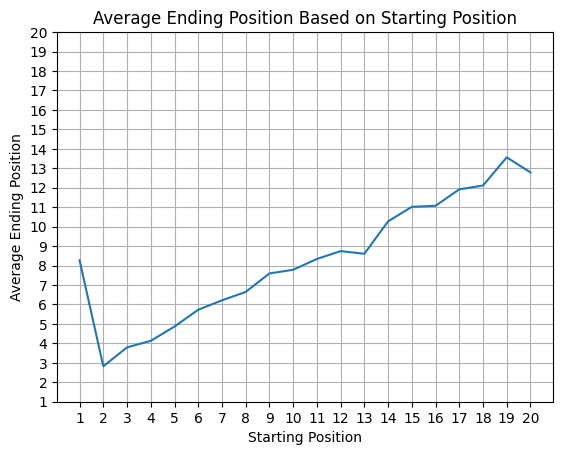

[8.272727272727273, 2.821656050955414, 3.7933333333333334, 4.13013698630137, 4.864285714285714, 5.728571428571429, 6.211678832116788, 6.642857142857143, 7.595238095238095, 7.782945736434108, 8.338709677419354, 8.741379310344827, 8.605263157894736, 10.271929824561404, 11.01834862385321, 11.072164948453608, 11.918367346938776, 12.113636363636363, 13.563218390804598, 12.788235294117648]


In [15]:
positions = np.linspace(1, 20, 20)
plt.plot(positions, avg_pos[:])
plt.xticks(positions)
plt.yticks(positions)
plt.xlabel('Starting Position')
plt.ylabel('Average Ending Position')
plt.title('Average Ending Position Based on Starting Position')
plt.grid()
plt.show()
print(avg_pos)
